In [28]:
# Import packages
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from toolz import interleave
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)
    return df[indices_to_keep].astype(np.float64)

def balance_df(df):
    # balance dataframe, interleave and standardize them to [0,1]
    df_candidate_0 = df[df['ExoplanetCandidate'] == 0]
    df_candidate_1 = df[df['ExoplanetCandidate'] == 1]
    
    sample_candidate_0 = df_candidate_0.sample(n=3700, random_state=42)
    sample_candidate_1 = df_candidate_1.sample(n=3700, random_state=42)
    
    # Concatenate the two sampled DataFrames
    columns_from_df1 = sample_candidate_0.columns
    combined_sample = pd.DataFrame(interleave([sample_candidate_0.values, sample_candidate_1.values]))
    combined_sample.columns = columns_from_df1

    # Separate features and result column
    features = combined_sample.drop(columns=['ExoplanetCandidate'])
    result = combined_sample['ExoplanetCandidate']

    # Initialize the scaler
    scaler = MinMaxScaler()
    
    # Fit and transform the data
    standardized_data = scaler.fit_transform(features)
    standardized_df = pd.DataFrame(standardized_data, columns=features.columns)
    # Combine the PCA-transformed features with the result column
    final_combined2 = pd.concat([standardized_df, result.reset_index(drop=True)], axis=1)
    return final_combined2

def read_raw_data():
    df = pd.read_csv('exoplanets_2018.csv')

    df = df.rename(columns={'kepid':'KepID',
    'kepoi_name':'KOIName',
    'kepler_name':'KeplerName',
    'koi_disposition':'ExoplanetArchiveDisposition',
    'koi_pdisposition':'DispositionUsingKeplerData',
    'koi_score':'DispositionScore',
    'koi_fpflag_nt':'NotTransit-LikeFalsePositiveFlag',
    'koi_fpflag_ss':'koi_fpflag_ss',
    'koi_fpflag_co':'CentroidOffsetFalsePositiveFlag',
    'koi_fpflag_ec':'EphemerisMatchIndicatesContaminationFalsePositiveFlag',
    'koi_period':'OrbitalPeriod[days',
    'koi_period_err1':'OrbitalPeriodUpperUnc.[days',
    'koi_period_err2':'OrbitalPeriodLowerUnc.[days',
    'koi_time0bk':'TransitEpoch[BKJD',
    'koi_time0bk_err1':'TransitEpochUpperUnc.[BKJD',
    'koi_time0bk_err2':'TransitEpochLowerUnc.[BKJD',
    'koi_impact':'ImpactParamete',
    'koi_impact_err1':'ImpactParameterUpperUnc',
    'koi_impact_err2':'ImpactParameterLowerUnc',
    'koi_duration':'TransitDuration[hrs',
    'koi_duration_err1':'TransitDurationUpperUnc.[hrs',
    'koi_duration_err2':'TransitDurationLowerUnc.[hrs',
    'koi_depth':'TransitDepth[ppm',
    'koi_depth_err1':'TransitDepthUpperUnc.[ppm',
    'koi_depth_err2':'TransitDepthLowerUnc.[ppm',
    'koi_prad':'PlanetaryRadius[Earthradii',
    'koi_prad_err1':'PlanetaryRadiusUpperUnc.[Earthradii',
    'koi_prad_err2':'PlanetaryRadiusLowerUnc.[Earthradii',
    'koi_teq':'EquilibriumTemperature[K',
    'koi_teq_err1':'EquilibriumTemperatureUpperUnc.[K',
    'koi_teq_err2':'EquilibriumTemperatureLowerUnc.[K',
    'koi_insol':'InsolationFlux[Earthflux',
    'koi_insol_err1':'InsolationFluxUpperUnc.[Earthflux',
    'koi_insol_err2':'InsolationFluxLowerUnc.[Earthflux',
    'koi_model_snr':'TransitSignal-to-Nois',
    'koi_tce_plnt_num':'TCEPlanetNumbe',
    'koi_tce_delivname':'TCEDeliver',
    'koi_steff':'StellarEffectiveTemperature[K',
    'koi_steff_err1':'StellarEffectiveTemperatureUpperUnc.[K',
    'koi_steff_err2':'StellarEffectiveTemperatureLowerUnc.[K',
    'koi_slogg':'StellarSurfaceGravity[log10(cm/s**2)',
    'koi_slogg_err1':'StellarSurfaceGravityUpperUnc.[log10(cm/s**2)',
    'koi_slogg_err2':'StellarSurfaceGravityLowerUnc.[log10(cm/s**2)',
    'koi_srad':'StellarRadius[Solarradii',
    'koi_srad_err1':'StellarRadiusUpperUnc.[Solarradii',
    'koi_srad_err2':'StellarRadiusLowerUnc.[Solarradii',
    'ra':'RA[decimaldegrees',
    'dec':'Dec[decimaldegrees',
    'koi_kepmag':'Kepler-band[mag]'
    })
    
    
    df['ExoplanetCandidate'] = df['DispositionUsingKeplerData'].apply(lambda x: 1 if x == 'CANDIDATE' else 0)
    df['ExoplanetConfirmed'] = df['ExoplanetArchiveDisposition'].apply(lambda x: 2 if x == 'CONFIRMED' else 1 if x == 'CANDIDATE' else 0 )
    df.drop(columns=['KeplerName','KOIName','EquilibriumTemperatureUpperUnc.[K',
                     'KepID','ExoplanetArchiveDisposition','DispositionUsingKeplerData',
                     'NotTransit-LikeFalsePositiveFlag','koi_fpflag_ss','CentroidOffsetFalsePositiveFlag',
                     'EphemerisMatchIndicatesContaminationFalsePositiveFlag','TCEDeliver',
                     'EquilibriumTemperatureLowerUnc.[K', 'ExoplanetConfirmed'], inplace=True)
    df.dropna(inplace=True)
    clean_dataset(df)

    return df

In [22]:
df = read_raw_data()
df.shape

(7803, 38)

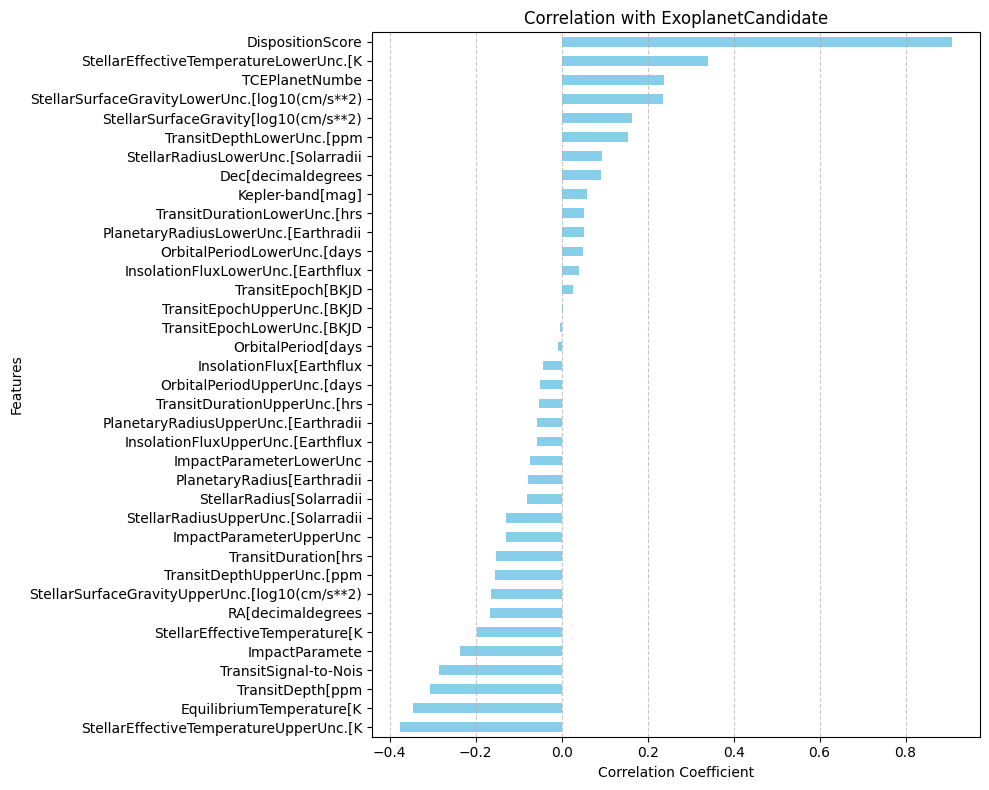

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already loaded

# Compute the correlation matrix
correlation_matrix = df.corr()

# Extract correlations with 'ExoplanetCandidate'
correlations_with_target = correlation_matrix['ExoplanetCandidate'].drop('ExoplanetCandidate')

# Plot the correlations
plt.figure(figsize=(10, 8))
correlations_with_target.sort_values().plot(kind='barh', color='skyblue')
plt.title('Correlation with ExoplanetCandidate')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [19]:
balanced_stand_df = balance_df(df)

#combined_sample = pd.concat([sample_candidate_0, sample_candidate_1]).sort_index().reset_index(drop=True)
# Display the combined DataFrame
balanced_stand_df.head(20)

DispositionScore  OrbitalPeriod[days  OrbitalPeriodUpperUnc.[days  \
0              0.000            0.008236                     0.000004   
1              0.135            0.037715                     0.005686   
2              0.000            0.035061                     0.010298   
3              0.966            0.002834                     0.000192   
4              0.000            0.007676                     0.000430   
5              0.519            0.343322                     0.035746   
6              0.000            0.002734                     0.000136   
7              1.000            0.106890                     0.001119   
8              0.000            0.000299                     0.000027   
9              1.000            0.006632                     0.000144   
10             0.946            0.040777                     0.000114   
11             1.000            0.010597                     0.000187   
12             0.000            0.001627                     0.000057   
13             1.000            0.211612                     0.006761   
14             0.000            0.007177                     0.000031   
15             0.872            0.056209                     0.013433   
16             0.008            0.530193                     0.150000   
17             1.000            0.001412                     0.000049   
18             0.000            0.002076                     0.000161   
19             1.000            0.005095                     0.000248   

    OrbitalPeriodLowerUnc.[days  TransitEpoch[BKJD  \
0                      0.999996           0.012020   
1                      0.994314           0.032536   
2                      0.989702           0.027985   
3                      0.999808           0.008818   
4                      0.999570           0.011305   
5                      0.964254           0.218679   
6                      0.999864           0.010246   
7                      0.998881           0.032978   
8                      0.999973           0.008459   
9                      0.999856           0.012053   
10                     0.999886           0.010095   
11                     0.999813           0.009932   
12                     0.999943           0.104583   
13                     0.993239           0.064199   
14                     0.999969           0.014899   
15                     0.986567           0.011679   
16                     0.850000           0.099181   
17                     0.999951           0.008522   
18                     0.999839           0.009774   
19                     0.999752           0.011655   

    TransitEpochUpperUnc.[BKJD  TransitEpochLowerUnc.[BKJD  ImpactParamete  \
0                     0.000074                    0.999926        0.024342   
1                     0.031795                    0.968205        0.027038   
2                     0.057806                    0.942194        0.001189   
3                     0.012639                    0.987361        0.028901   
4                     0.010758                    0.989242        0.019267   
5                     0.017068                    0.982932        0.035760   
6                     0.007665                    0.992335        0.046702   
7                     0.001702                    0.998298        0.023589   
8                     0.008596                    0.991404        0.025293   
9                     0.003746                    0.996254        0.010030   
10                    0.000498                    0.999502        0.033896   
11                    0.003060                    0.996940        0.001189   
12                    0.004589                    0.995411        0.009594   
13                    0.006347                    0.993653        0.028980   
14                    0.000737                    0.999263        0.049754   
15                    0.044274                    0.955726        0.017880   
16       

In [20]:
balanced_stand_df.to_csv('planet.txt', sep=',', index=False, header=False)

## PCA Data

In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df = read_raw_data()

# Separate features and result column
features = df.drop(columns=['ExoplanetCandidate'])
result = df['ExoplanetCandidate']

# Apply PCA on features only
pca = PCA(n_components=20)  # Adjust `n_components` as needed
pca_features = pca.fit_transform(features)
pca_df = pd.DataFrame(pca_features, columns=[f'PC{i+1}' for i in range(pca.n_components)])
combined_df = pd.concat([pca_df, result.reset_index(drop=True)], axis=1)

pca_final = balance_df(combined_df)
# Display the final DataFrame
pca_final

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     0.000113  0.352439  0.716348  0.540433  0.217290  0.501284  0.453614   
1     0.000181  0.000133  0.716084  0.540963  0.212935  0.391204  0.349860   
2     0.000178  0.000512  0.716080  0.540960  0.168736  0.384069  0.385669   
3     0.000227  0.000140  0.716160  0.541101  0.194719  0.359498  0.439963   
4     0.000194  0.000266  0.716100  0.541016  0.175118  0.368009  0.430408   
...        ...       ...       ...       ...       ...       ...       ...   
7395  0.000188  0.000762  0.716091  0.540964  0.193591  0.383576  0.402853   
7396  0.000539  0.062141  0.716390  0.542084  0.259042  0.400613  0.481443   
7397  0.000259  0.000084  0.716169  0.541025  0.258004  0.371860  0.377221   
7398  0.000633  0.000033  0.716745  0.542398  0.251699  0.337691  0.469672   
7399  0.000184  0.000196  0.716086  0.540961  0.178633  0.375343  0.406314   

           PC8       PC9      PC10  ...      PC12      PC13      PC14  \
0     0.027747  0.711185  0.165448  ...  0.294759  0.285119  0.645014   
1     0.032070  0.704755  0.163770  ...  0.302144  0.284291  0.643136   
2     0.032356  0.702264  0.169921  ...  0.296449  0.282177  0.673744   
3     0.030266  0.703264  0.166419  ...  0.292201  0.280690  0.673071   
4     0.030664  0.703695  0.160937  ...  0.292702  0.280926  0.681157   
...        ...       ...       ...  ...       ...       ...       ...   
7395  0.031250  0.703983  0.155109  ...  0.296250  0.282497  0.667376   
7396  0.031186  0.700516  0.189000  ...  0.293178  0.280629  0.685563   
7397  0.030955  0.704151  0.152496  ...  0.295740  0.283526  0.640611   
7398  0.028738  0.703097  0.193054  ...  0.292774  0.278855  0.675927   
7399  0.031231  0.703755  0.155291  ...  0.296699  0.282999  0.652113   

          PC15      PC16      PC17      PC18      PC19      PC20  \
0     0.526017  0.474673  0.156735  0.815569  0.182497  0.667453   
1     0.507704  0.479859  0.184922  0.642060  0.179123  0.277918   
2     0.505721  0.470938  0.161988  0.627835  0.178628  0.152916   
3     0.509915  0.471991  0.131135  0.596471  0.175931  0.682080   
4     0.507940  0.474782  0.167974  0.853476  0.175193  0.658660   
...        ...       ...       ...       ...       ...       ...   
7395  0.507882  0.477957  0.152373  0.782392  0.178441  0.493828   
7396  0.514545  0.474878  0.145420  0.791713  0.172687  0.483895   
7397  0.511242  0.483089  0.147483  0.783560  0.179580  0.315941   
7398  0.513987  0.478009  0.145034  0.678886  0.167747  0.725175   
7399  0.509285  0.479988  0.133828  0.653838  0.178766  0.866578   

      ExoplanetCandidate  
0                    0.0  
1                    1.0  
2                    0.0  
3                    1.0  
4                    0.0  
...                  ...  
7395                 1.0  
7396                 0.0  
7397                 1.0  
7398                 0.0  
7399                 1.0  

[7400 rows x 21 columns]

In [27]:
pca_final.to_csv('planet_pca_stand.txt', sep=',', index=False, header=False)

## Clean Data Again for Confirmed

In [8]:
df = pd.read_csv('exoplanets_2018.csv')

df = df.rename(columns={'kepid':'KepID',
'kepoi_name':'KOIName',
'kepler_name':'KeplerName',
'koi_disposition':'ExoplanetArchiveDisposition',
'koi_pdisposition':'DispositionUsingKeplerData',
'koi_score':'DispositionScore',
'koi_fpflag_nt':'NotTransit-LikeFalsePositiveFlag',
'koi_fpflag_ss':'koi_fpflag_ss',
'koi_fpflag_co':'CentroidOffsetFalsePositiveFlag',
'koi_fpflag_ec':'EphemerisMatchIndicatesContaminationFalsePositiveFlag',
'koi_period':'OrbitalPeriod[days',
'koi_period_err1':'OrbitalPeriodUpperUnc.[days',
'koi_period_err2':'OrbitalPeriodLowerUnc.[days',
'koi_time0bk':'TransitEpoch[BKJD',
'koi_time0bk_err1':'TransitEpochUpperUnc.[BKJD',
'koi_time0bk_err2':'TransitEpochLowerUnc.[BKJD',
'koi_impact':'ImpactParamete',
'koi_impact_err1':'ImpactParameterUpperUnc',
'koi_impact_err2':'ImpactParameterLowerUnc',
'koi_duration':'TransitDuration[hrs',
'koi_duration_err1':'TransitDurationUpperUnc.[hrs',
'koi_duration_err2':'TransitDurationLowerUnc.[hrs',
'koi_depth':'TransitDepth[ppm',
'koi_depth_err1':'TransitDepthUpperUnc.[ppm',
'koi_depth_err2':'TransitDepthLowerUnc.[ppm',
'koi_prad':'PlanetaryRadius[Earthradii',
'koi_prad_err1':'PlanetaryRadiusUpperUnc.[Earthradii',
'koi_prad_err2':'PlanetaryRadiusLowerUnc.[Earthradii',
'koi_teq':'EquilibriumTemperature[K',
'koi_teq_err1':'EquilibriumTemperatureUpperUnc.[K',
'koi_teq_err2':'EquilibriumTemperatureLowerUnc.[K',
'koi_insol':'InsolationFlux[Earthflux',
'koi_insol_err1':'InsolationFluxUpperUnc.[Earthflux',
'koi_insol_err2':'InsolationFluxLowerUnc.[Earthflux',
'koi_model_snr':'TransitSignal-to-Nois',
'koi_tce_plnt_num':'TCEPlanetNumbe',
'koi_tce_delivname':'TCEDeliver',
'koi_steff':'StellarEffectiveTemperature[K',
'koi_steff_err1':'StellarEffectiveTemperatureUpperUnc.[K',
'koi_steff_err2':'StellarEffectiveTemperatureLowerUnc.[K',
'koi_slogg':'StellarSurfaceGravity[log10(cm/s**2)',
'koi_slogg_err1':'StellarSurfaceGravityUpperUnc.[log10(cm/s**2)',
'koi_slogg_err2':'StellarSurfaceGravityLowerUnc.[log10(cm/s**2)',
'koi_srad':'StellarRadius[Solarradii',
'koi_srad_err1':'StellarRadiusUpperUnc.[Solarradii',
'koi_srad_err2':'StellarRadiusLowerUnc.[Solarradii',
'ra':'RA[decimaldegrees',
'dec':'Dec[decimaldegrees',
'koi_kepmag':'Kepler-band[mag]'
})


df['ExoplanetCandidate'] = df['DispositionUsingKeplerData'].apply(lambda x: 1 if x == 'CANDIDATE' else 0)
df['ExoplanetConfirmed'] = df['ExoplanetArchiveDisposition'].apply(lambda x: 2 if x == 'CONFIRMED' else 1 if x == 'CANDIDATE' else 0 )
df.drop(columns=['KeplerName','KOIName','EquilibriumTemperatureUpperUnc.[K',
                 'KepID','ExoplanetArchiveDisposition','DispositionUsingKeplerData',
                 'NotTransit-LikeFalsePositiveFlag','koi_fpflag_ss','CentroidOffsetFalsePositiveFlag',
                 'EphemerisMatchIndicatesContaminationFalsePositiveFlag','TCEDeliver',
                 'EquilibriumTemperatureLowerUnc.[K'], inplace=True)
df.dropna(inplace=True)
clean_dataset(df)
df.head(10)

DispositionScore  OrbitalPeriod[days  OrbitalPeriodUpperUnc.[days  \
0             1.000            9.488036                 2.780000e-05   
1             0.969           54.418383                 2.480000e-04   
2             0.000           19.899140                 1.490000e-05   
3             0.000            1.736952                 2.630000e-07   
4             1.000            2.525592                 3.760000e-06   
5             1.000           11.094321                 2.040000e-05   
6             1.000            4.134435                 1.050000e-05   
7             0.992            2.566589                 1.780000e-05   
8             0.000            7.361790                 2.130000e-05   
9             1.000           16.068647                 1.090000e-05   

   OrbitalPeriodLowerUnc.[days  TransitEpoch[BKJD  TransitEpochUpperUnc.[BKJD  \
0                -2.780000e-05         170.538750                    0.002160   
1                -2.480000e-04         162.513840                    0.003520   
2                -1.490000e-05         175.850252                    0.000581   
3                -2.630000e-07         170.307565                    0.000115   
4                -3.760000e-06         171.595550                    0.001130   
5                -2.040000e-05         171.201160                    0.001410   
6                -1.050000e-05         172.979370                    0.001900   
7                -1.780000e-05         179.554370                    0.004610   
8                -2.130000e-05         132.250530                    0.002530   
9                -1.090000e-05         173.621937                    0.000517   

   TransitEpochLowerUnc.[BKJD  ImpactParamete  ImpactParameterUpperUnc  \
0                   -0.002160           0.146                    0.318   
1                   -0.003520           0.586                    0.059   
2                   -0.000581           0.969                    5.126   
3                   -0.000115           1.276                    0.115   
4                   -0.001130           0.701                    0.235   
5                   -0.001410           0.538                    0.030   
6                   -0.001900           0.762                    0.139   
7                   -0.004610           0.755                    0.212   
8                   -0.002530           1.169                    7.133   
9                   -0.000517           0.052                    0.262   

   ImpactParameterLowerUnc  ...  \
0                   -0.146  ...   
1                   -0.443  ...   
2                   -0.077  ...   
3                   -0.092  ...   
4                   -0.478  ...   
5                   -0.428  ...   
6                   -0.532  ...   
7                   -0.523  ...   
8                   -0.044  ...   
9                   -0.052  ...   

   StellarSurfaceGravityUpperUnc.[log10(cm/s**2)  \
0                                          0.064   
1                                          0.064   
2                                          0.044   
3                                          0.053   
4                                          0.070   
5                                          0.054   
6                                          0.054   
7                                          0.054   
8                                          0.182   
9                                          0.083   

   StellarSurfaceGravityLowerUnc.[log10(cm/s**2)  StellarRadius[Solarradii  \
0                                         -0.096                     0.927   
1                                         -0.096                     0.927   
2                                         -0.176                     0.868   
3                                         -0.168                     0.791   
4                                         -0.210                     1.046   
5                                         -0.229                     0.972  

## get data with strong corr (|corr| > 0.2)

In [3]:
df = pd.read_csv('exoplanets_2018.csv')

df = df.rename(columns={'kepid':'KepID',
'kepoi_name':'KOIName',
'kepler_name':'KeplerName',
'koi_disposition':'ExoplanetArchiveDisposition',
'koi_pdisposition':'DispositionUsingKeplerData',
'koi_score':'DispositionScore',
'koi_fpflag_nt':'NotTransit-LikeFalsePositiveFlag',
'koi_fpflag_ss':'koi_fpflag_ss',
'koi_fpflag_co':'CentroidOffsetFalsePositiveFlag',
'koi_fpflag_ec':'EphemerisMatchIndicatesContaminationFalsePositiveFlag',
'koi_period':'OrbitalPeriod[days',
'koi_period_err1':'OrbitalPeriodUpperUnc.[days',
'koi_period_err2':'OrbitalPeriodLowerUnc.[days',
'koi_time0bk':'TransitEpoch[BKJD',
'koi_time0bk_err1':'TransitEpochUpperUnc.[BKJD',
'koi_time0bk_err2':'TransitEpochLowerUnc.[BKJD',
'koi_impact':'ImpactParamete',
'koi_impact_err1':'ImpactParameterUpperUnc',
'koi_impact_err2':'ImpactParameterLowerUnc',
'koi_duration':'TransitDuration[hrs',
'koi_duration_err1':'TransitDurationUpperUnc.[hrs',
'koi_duration_err2':'TransitDurationLowerUnc.[hrs',
'koi_depth':'TransitDepth[ppm',
'koi_depth_err1':'TransitDepthUpperUnc.[ppm',
'koi_depth_err2':'TransitDepthLowerUnc.[ppm',
'koi_prad':'PlanetaryRadius[Earthradii',
'koi_prad_err1':'PlanetaryRadiusUpperUnc.[Earthradii',
'koi_prad_err2':'PlanetaryRadiusLowerUnc.[Earthradii',
'koi_teq':'EquilibriumTemperature[K',
'koi_teq_err1':'EquilibriumTemperatureUpperUnc.[K',
'koi_teq_err2':'EquilibriumTemperatureLowerUnc.[K',
'koi_insol':'InsolationFlux[Earthflux',
'koi_insol_err1':'InsolationFluxUpperUnc.[Earthflux',
'koi_insol_err2':'InsolationFluxLowerUnc.[Earthflux',
'koi_model_snr':'TransitSignal-to-Nois',
'koi_tce_plnt_num':'TCEPlanetNumbe',
'koi_tce_delivname':'TCEDeliver',
'koi_steff':'StellarEffectiveTemperature[K',
'koi_steff_err1':'StellarEffectiveTemperatureUpperUnc.[K',
'koi_steff_err2':'StellarEffectiveTemperatureLowerUnc.[K',
'koi_slogg':'StellarSurfaceGravity[log10(cm/s**2)',
'koi_slogg_err1':'StellarSurfaceGravityUpperUnc.[log10(cm/s**2)',
'koi_slogg_err2':'StellarSurfaceGravityLowerUnc.[log10(cm/s**2)',
'koi_srad':'StellarRadius[Solarradii',
'koi_srad_err1':'StellarRadiusUpperUnc.[Solarradii',
'koi_srad_err2':'StellarRadiusLowerUnc.[Solarradii',
'ra':'RA[decimaldegrees',
'dec':'Dec[decimaldegrees',
'koi_kepmag':'Kepler-band[mag]'
})


df['ExoplanetCandidate'] = df['DispositionUsingKeplerData'].apply(lambda x: 1 if x == 'CANDIDATE' else 0)
df['ExoplanetConfirmed'] = df['ExoplanetArchiveDisposition'].apply(lambda x: 2 if x == 'CONFIRMED' else 1 if x == 'CANDIDATE' else 0 )
df.drop(columns=['KeplerName','KOIName','EquilibriumTemperatureUpperUnc.[K',
                 'KepID','ExoplanetArchiveDisposition','DispositionUsingKeplerData',
                 'NotTransit-LikeFalsePositiveFlag','koi_fpflag_ss','CentroidOffsetFalsePositiveFlag',
                 'EphemerisMatchIndicatesContaminationFalsePositiveFlag','TCEDeliver',
                 'EquilibriumTemperatureLowerUnc.[K', 'ExoplanetConfirmed'], inplace=True)
df.dropna(inplace=True)
clean_dataset(df)
df.shape

(7803, 38)

In [11]:
columns_to_extract = [
    'DispositionScore',
    'StellarEffectiveTemperatureLowerUnc.[K',
    'TCEPlanetNumbe', 
    'StellarSurfaceGravityLowerUnc.[log10(cm/s**2)',
    'StellarEffectiveTemperatureUpperUnc.[K',
    'EquilibriumTemperature[K',
    'TransitDepth[ppm',
    'TransitSignal-to-Nois',
    'ImpactParamete',
    'ExoplanetCandidate'
]

# Create a new DataFrame with only the selected columns
strong_corr_df = df[columns_to_extract]
balanced_strong_corr_df = balance_df(strong_corr_df)
balanced_strong_corr_df.to_csv('planet_corr_9.txt', sep=',', index=False, header=False)

In [12]:
columns_to_extract = [
    'DispositionScore',
    'StellarEffectiveTemperatureLowerUnc.[K',
    'StellarEffectiveTemperatureUpperUnc.[K',
    'EquilibriumTemperature[K',
    'TransitDepth[ppm',
    'ExoplanetCandidate'
]

# Create a new DataFrame with only the selected columns
strong_corr5_df = df[columns_to_extract]

balanced_strong_corr5_df = balance_df(strong_corr5_df)
balanced_strong_corr5_df.to_csv('planet_corr_5.txt', sep=',', index=False, header=False)

In [13]:
columns_to_extract = [
    'DispositionScore',
    'StellarEffectiveTemperatureLowerUnc.[K',
    'StellarEffectiveTemperatureUpperUnc.[K',
    'EquilibriumTemperature[K',
    'ExoplanetCandidate'
]

# Create a new DataFrame with only the selected columns
strong_corr3_df = df[columns_to_extract]

balanced_strong_corr3_df = balance_df(strong_corr3_df)
balanced_strong_corr3_df.to_csv('planet_corr_4.txt', sep=',', index=False, header=False)

## generate different PCA data (2-15 inc)

In [30]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def pca_data(n_comp):
    df = read_raw_data()
    
    # Separate features and result column
    features = df.drop(columns=['ExoplanetCandidate'])
    result = df['ExoplanetCandidate']
    
    # Apply PCA on features only
    pca = PCA(n_components=n_comp)  # Adjust `n_components` as needed
    pca_features = pca.fit_transform(features)
    pca_df = pd.DataFrame(pca_features, columns=[f'PC{i+1}' for i in range(pca.n_components)])
    combined_df = pd.concat([pca_df, result.reset_index(drop=True)], axis=1)
    
    pca_final = balance_df(combined_df)

    file_name = f"planet_pca_stand_"+ str(n_comp) + ".txt"
    
    pca_final.to_csv(file_name, sep=',', index=False, header=False)

for i in range(2,16):
    pca_data(i)